Student: Michael Menjares

# Part 1
Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:

1. Source of data

2. Brief description of data

3. What is the target?

4. What does one row represent? (A person?  A business?  An event? A product?)

5. Is this a classification or regression problem?

6. How many features does the data have?

7. How many rows are in the dataset?

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

Create a NEW GitHub repository for this project, with a readme, and add your notebook to that new repository.


- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.
- Commit your file to your Github repository and submit the link below.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_selector, make_column_transformer


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

## Adult Income

Dataset contains 14 features such as individual’s education level, age, gender, occupation and explores the possibility in predicting whether an individual will make more than $50k in annual income based on these features. The dataset has 48,842 rows and each row represents an individual. This is a classification problem since the target is the income column which has two classes: <=50K and >50K. As far as a challenge, some of the data has a '?' which is pressumed to be a NaN or missing value.

source: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


In [37]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vStYRY6SXzBSdI6psSMrZLiTc2vteGZbPv57tyZaE4csMWbQSa9MJuRXJJXo2kYa-hFuppkA8mtfhli/pub?gid=488173702&single=true&output=csv'
df_original = pd.read_csv(url)
df = df_original.copy()
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [39]:
target = ['income']
drop_cols = ['fnlwgt','education']

drop_cols = target + drop_cols

y = df[target]
X = df.drop(columns = drop_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f'Target Values:\n{y.head()}\n\nFeatures:')

X.head()

Target Values:
  income
0  <=50K
1  <=50K
2   >50K
3   >50K
4  <=50K

Features:


age  workclass  educational-num      marital-status         occupation  \
0   25    Private                7       Never-married  Machine-op-inspct   
1   38    Private                9  Married-civ-spouse    Farming-fishing   
2   28  Local-gov               12  Married-civ-spouse    Protective-serv   
3   44    Private               10  Married-civ-spouse  Machine-op-inspct   
4   18          ?               10       Never-married                  ?   

  relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0    Own-child  Black    Male             0             0              40   
1      Husband  White    Male             0             0              50   
2      Husband  White    Male             0             0              40   
3      Husband  Black    Male          7688             0              40   
4    Own-child  White  Female             0             0              30   

  native-country  
0  United-States  
1  United-States  
2  United-States  
3  United-States  
4  United-States

Decided to drop fnlwgt which is a number created by surveyors and felt did not have a correlation to target. Also dropped education column since education num is the same data as education-num but in integer form.

#Clean Data

Duplicates

In [40]:
print(f'{df.duplicated().sum()} duplicates before drop')
df.drop_duplicates(inplace = True)
print(f'Duplicates dropped\n{df.duplicated().sum()} duplicates after drop')

52 duplicates before drop
Duplicates dropped
0 duplicates after drop


Missing Data

In [41]:
print(f'{df.isna().sum().sum()} of the {len(df)} entries have missing values.')
print(f'\nThis is {round(df.isna().sum().sum()/len(df)*100)}% of the entries')
print(f'\nMissing Entries by Column:\n{df.isna().sum()}')

0 of the 48790 entries have missing values.

This is 0% of the entries

Missing Entries by Column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


even though shows no missing values, a few columns have values marked '?' which is assumed to be unknown or a missing value.

Check Datatypes and Inconsistent Values

In [42]:
print(f'X Data Types:\n\n{X.dtypes}\n')
print(f'y Data Types:\n\n{y.dtypes}')

X Data Types:

age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

y Data Types:

income    object
dtype: object


In [43]:
X.head()

age  workclass  educational-num      marital-status         occupation  \
0   25    Private                7       Never-married  Machine-op-inspct   
1   38    Private                9  Married-civ-spouse    Farming-fishing   
2   28  Local-gov               12  Married-civ-spouse    Protective-serv   
3   44    Private               10  Married-civ-spouse  Machine-op-inspct   
4   18          ?               10       Never-married                  ?   

  relationship   race  gender  capital-gain  capital-loss  hours-per-week  \
0    Own-child  Black    Male             0             0              40   
1      Husband  White    Male             0             0              50   
2      Husband  White    Male             0             0              40   
3      Husband  Black    Male          7688             0              40   
4    Own-child  White  Female             0             0              30   

  native-country  
0  United-States  
1  United-States  
2  United-States  
3  United-States  
4  United-States

In [44]:
pd.set_option("display.max_rows", None)
for x in X.columns:
  print(X[x].value_counts(dropna=False), '\n')

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
24    1206
39    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
50     866
18     862
49     847
48     845
52     738
53     711
55     621
54     613
17     595
56     564
58     555
57     551
59     523
61     450
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, dtype: int64 

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Fede

In [45]:
#replace ? with unknown since thought looked better to be a string than a symbol or single character
X['workclass'] = X['workclass'].str.replace('?', "unknown")
X['occupation'] = X['occupation'].str.replace('?', "unknown")
X['native-country'] = X['native-country'].str.replace('?', "unknown")
# https://stackoverflow.com/questions/44585636/python-pandas-how-to-replace-string-contain


C:\Users\mmenj\AppData\Local\Temp\ipykernel_24220\307125790.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['workclass'] = X['workclass'].str.replace('?', "unknown")
C:\Users\mmenj\AppData\Local\Temp\ipykernel_24220\307125790.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['occupation'] = X['occupation'].str.replace('?', "unknown")
C:\Users\mmenj\AppData\Local\Temp\ipykernel_24220\307125790.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  X['native-country'] = X['native-country'].str.replace('?', "unknown"

In [46]:
X.dtypes 

age                 int64
workclass          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

#EDA

In [47]:
X.describe() 

age  educational-num  capital-gain  capital-loss  \
count  48842.000000     48842.000000  48842.000000  48842.000000   
mean      38.643585        10.078089   1079.067626     87.502314   
std       13.710510         2.570973   7452.019058    403.004552   
min       17.000000         1.000000      0.000000      0.000000   
25%       28.000000         9.000000      0.000000      0.000000   
50%       37.000000        10.000000      0.000000      0.000000   
75%       48.000000        12.000000      0.000000      0.000000   
max       90.000000        16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [48]:
col_name = 'age'
ax = sns.histplot(data = X, x = col_name,bins=range(min(X[col_name]), max(X[col_name]) + 1))
plt.title(f'Distribution of {col_name}')
plt.show()
print(f'the ages are skewed to the left and peak between 30 and 40 years old')

the ages are skewed to the left and peak between 30 and 40 years old


In [49]:
col_name = 'educational-num'
ax = sns.histplot(data = X, x = col_name,bins=range(min(X[col_name]), max(X[col_name]) + 1))
plt.title(f'Distribution of {col_name}')
plt.show()
print(f'the education levels skew to the right and most frequent levels are 10,11,14 which are some-college, assocociates or vocational, and masters')

the education levels skew to the right and most frequent levels are 10,11,14 which are some-college, assocociates or vocational, and masters


In [50]:
col_name = 'capital-gain'
ax = sns.histplot(data = X, x = col_name)
plt.title(f'Distribution of {col_name}')
plt.show()
print(f'most did not save any capital')

most did not save any capital


In [51]:
col_name = 'capital-loss'
ax = sns.histplot(data = X, x = col_name)
plt.title(f'Distribution of {col_name}')
plt.show()
print(f'most did not save any lose any capital but if they did, a few lost around $2000')

most did not save any lose any capital but if they did, a few lost around $2000


In [52]:
col_name = 'workclass'
sns.countplot(x=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel(col_name)
plt.ylabel('Count')
plt.show()
print('Most work for private companies')

Most work for private companies


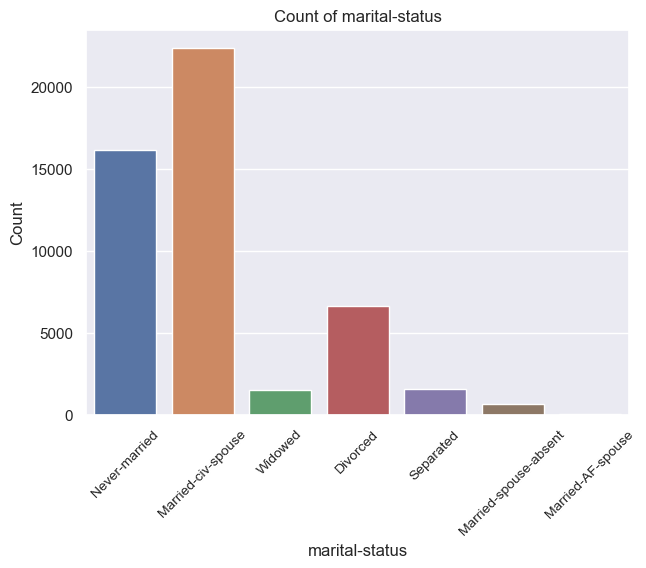

Most are married with a civilian spouse or never married


In [53]:
col_name = 'marital-status'
sns.countplot(x=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel(col_name)
plt.ylabel('Count')
plt.show()
print('Most are married with a civilian spouse or never married')

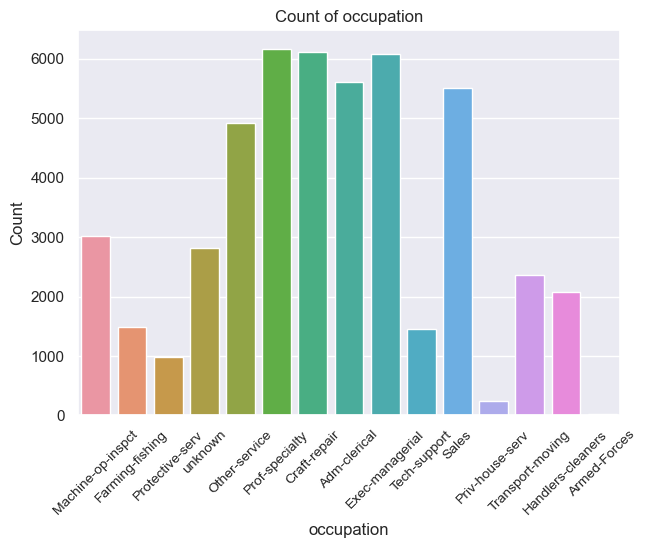

In [54]:
col_name = 'occupation'
sns.countplot(x=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel(col_name)
plt.ylabel('Count')
plt.show()

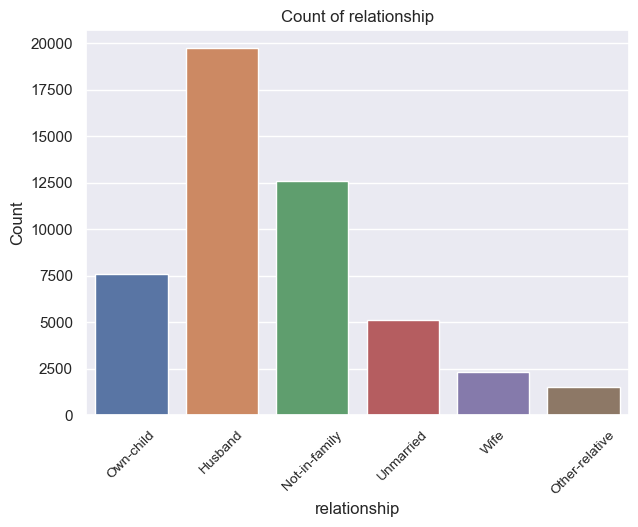

Most common relationship is husband of household or not in family


In [55]:
col_name = 'relationship'
sns.countplot(x=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel(col_name)
plt.ylabel('Count')
plt.show()
print('Most common relationship is husband of household or not in family')

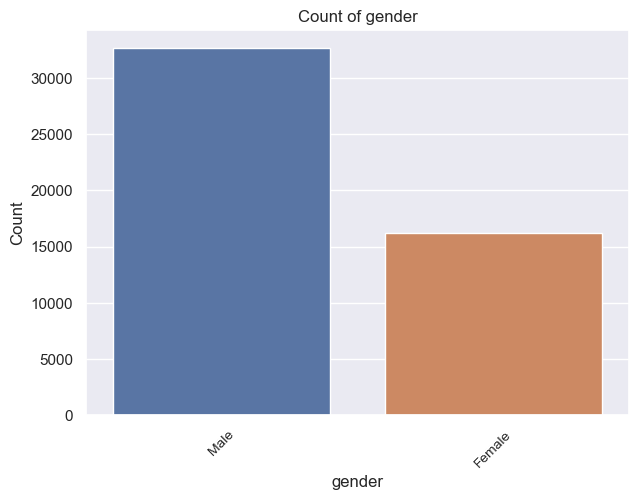

about twice as many males than females in the dataset


In [56]:
col_name = 'gender'
sns.countplot(x=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(7,5)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel(col_name)
plt.ylabel('Count')
plt.show()
print('about twice as many males than females in the dataset')

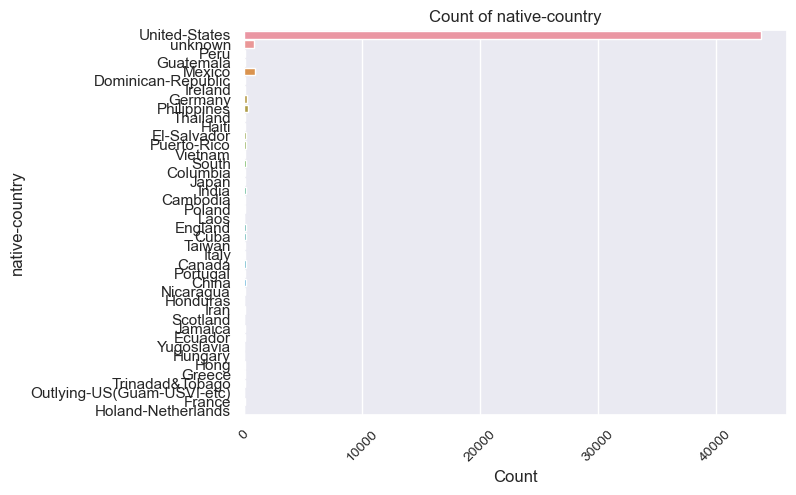

Most common native countries are US, unknown, and Mexico


In [57]:
col_name = 'native-country'
sns.countplot(y=col_name, data=X)
plt.title(f'Count of {col_name}')
sns.set(rc={'figure.figsize':(170,150)})
plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Count')
plt.ylabel(col_name)
plt.show()
print('Most common native countries are US, unknown, and Mexico')

# Part 3
1. For this part of the project, you will continue your data exploration by:

    - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
    - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
    
    
2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

    - These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions.  They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

In [58]:
X['net-capital'] = X['capital-gain'] - X['capital-loss']
X = X.drop(['capital-gain', 'capital-loss'], axis=1)
X.head()

age  workclass  educational-num      marital-status         occupation  \
0   25    Private                7       Never-married  Machine-op-inspct   
1   38    Private                9  Married-civ-spouse    Farming-fishing   
2   28  Local-gov               12  Married-civ-spouse    Protective-serv   
3   44    Private               10  Married-civ-spouse  Machine-op-inspct   
4   18    unknown               10       Never-married            unknown   

  relationship   race  gender  hours-per-week native-country  net-capital  
0    Own-child  Black    Male              40  United-States            0  
1      Husband  White    Male              50  United-States            0  
2      Husband  White    Male              40  United-States            0  
3      Husband  Black    Male              40  United-States         7688  
4    Own-child  White  Female              30  United-States            0

In [59]:
X['net-capital'].value_counts()

 0        42525
 15024      513
 7688       410
 7298       364
-1902       304
-1977       253
 99999      244
-1887       233
 3103       152
 5178       146
 5013       117
 4386       108
 8614        82
 3325        81
 2174        74
-2415        72
-1485        71
-1848        67
 10520       64
 4650        63
-1590        62
-1602        62
-1876        59
-1740        58
 27828       58
 4064        54
 594         52
 3137        51
-1672        50
 14084       49
 20051       49
-1741        44
-1564        43
 2829        42
 13550       42
 6849        42
 3908        42
-2258        39
-1719        38
 1055        37
-1980        36
-1408        35
-2001        35
 4787        35
-1669        35
 14344       34
 3411        34
 3464        33
-2002        33
 2597        31
 9386        31
 2176        31
 2885        30
-1579        30
 4101        29
-2051        29
 2202        28
-1721        28
-1974        28
-2339        27
-1504        26
 4865        25
 2407   

C:\Users\mmenj\AppData\Local\Temp\ipykernel_24220\4293495446.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X.corr()


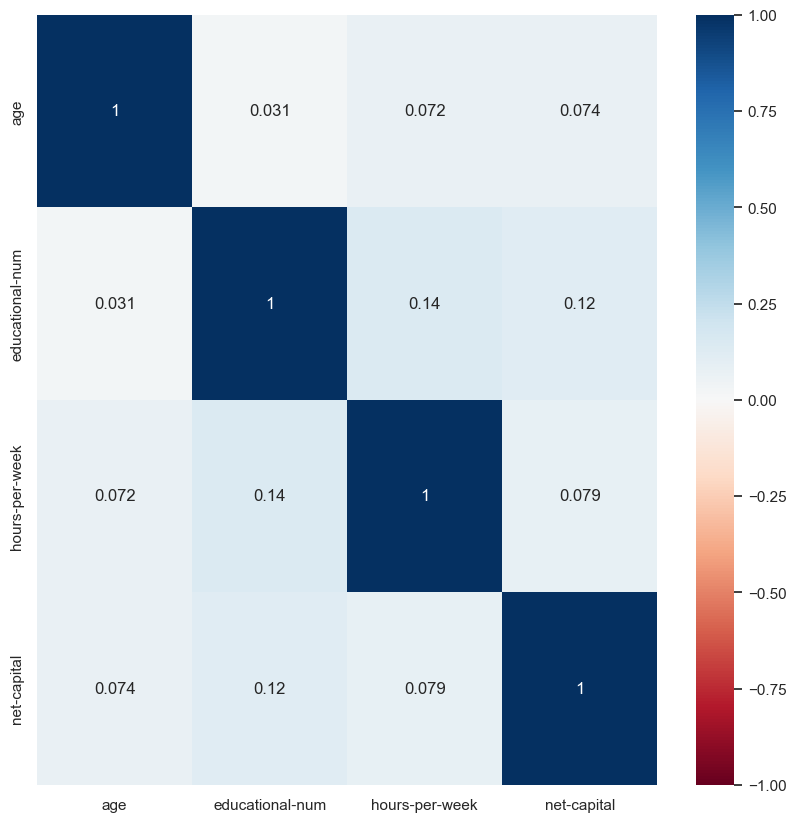

In [60]:
corr = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot = True);

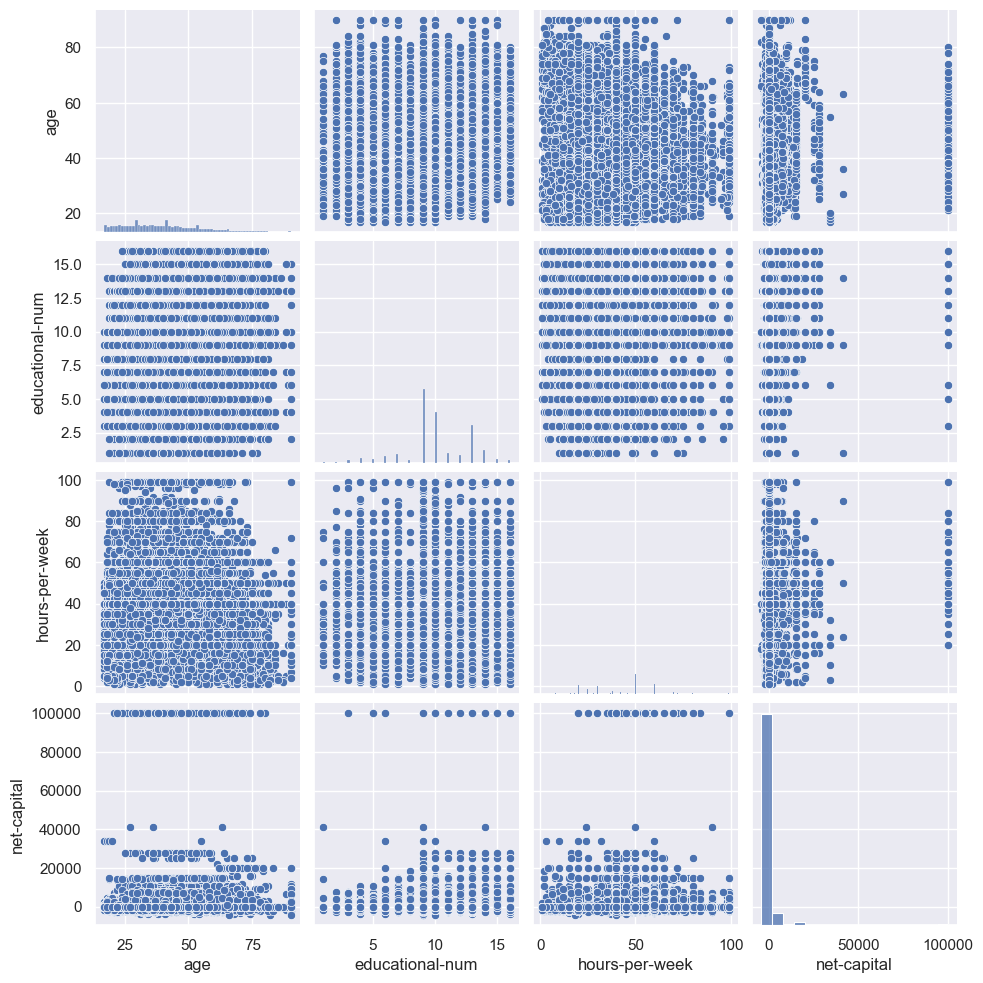

In [61]:
sns.pairplot(X);

No obvious pattern or correlation between columns

In [62]:
def groupby_plot(groupby, groupwhat):
    means = X.groupby(groupby)[groupwhat].mean().sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(data=X,x=groupby, y = groupwhat, order = means.index)
    plt.xticks()
    ax.set_title(f'Average {groupwhat} vs. {groupby}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(groupby, fontsize = 15, fontweight = 'bold')
    ax.set_ylabel(groupwhat, fontsize = 15, fontweight = 'bold');

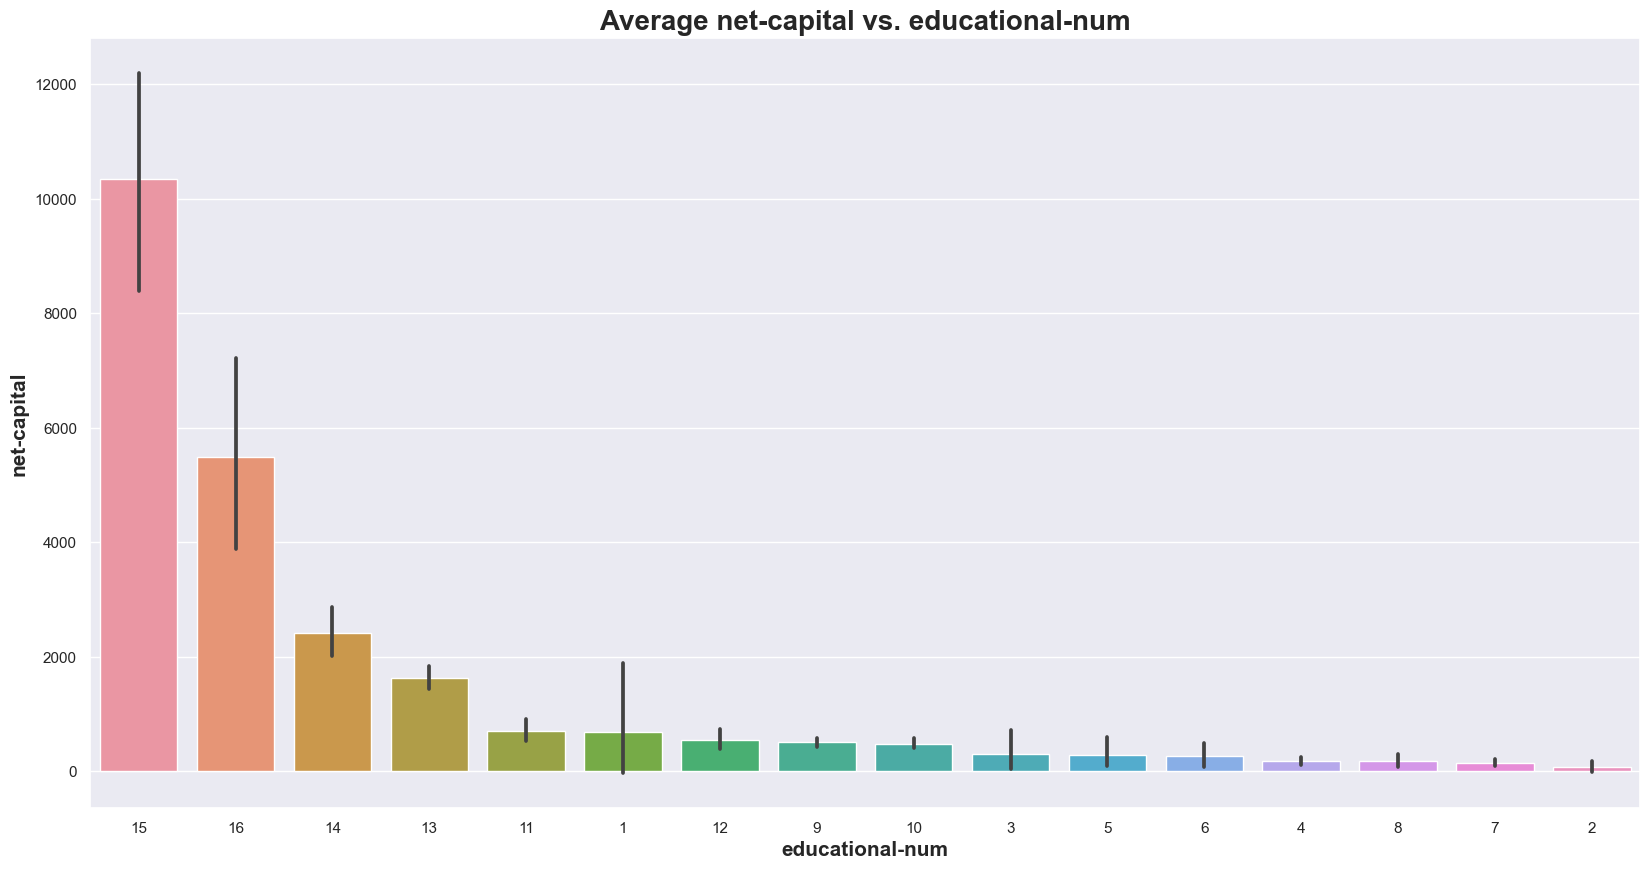

In [63]:
groupby_plot('educational-num','net-capital')

Bachelors or higher (13+) have the top 4 spots for average net capital

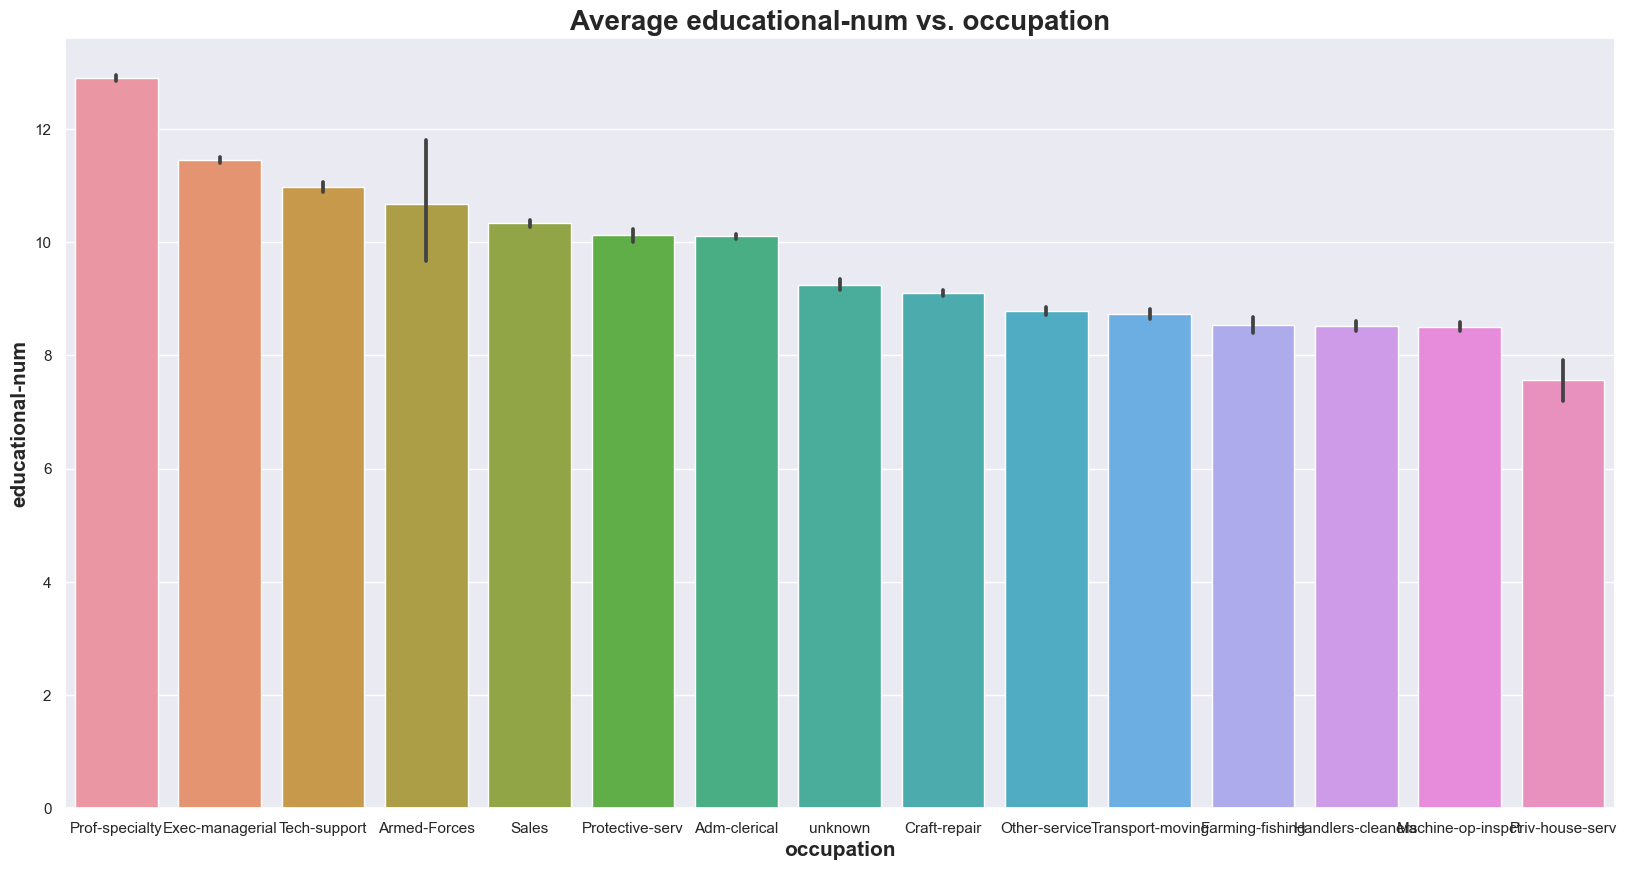

In [64]:
groupby_plot('occupation','educational-num')

Bachelors or higher (13+) have the top 4 spots for average hours worked

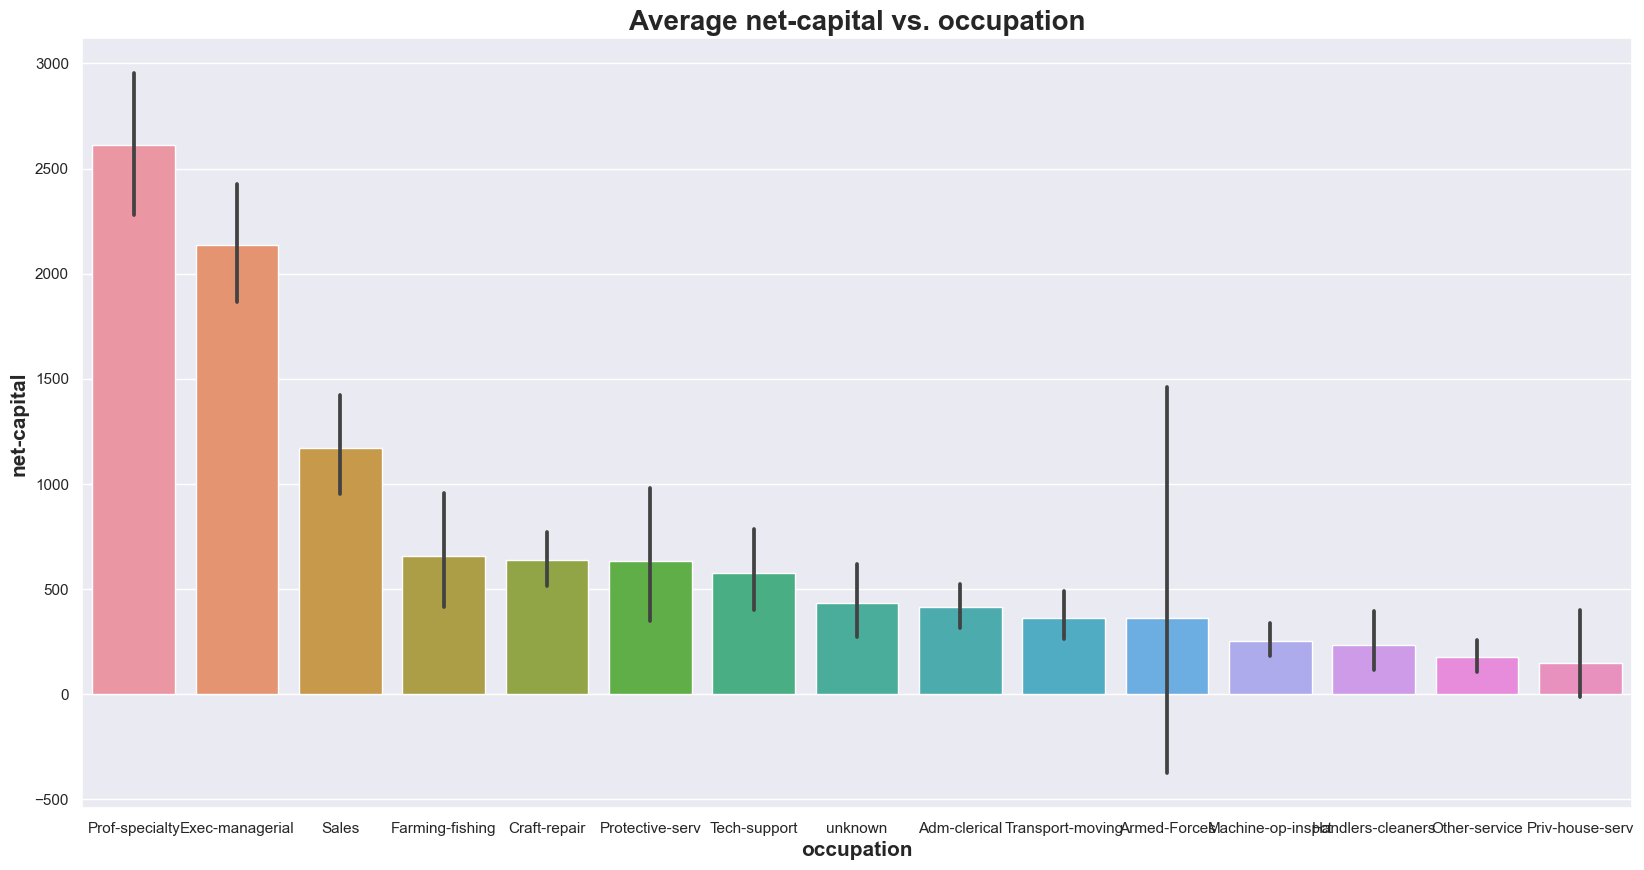

In [65]:
groupby_plot('occupation','net-capital')

# Part 4
**Modeling**

- Ensure that you complete the appropriate pre-processing steps.
- Fit and evaluate multiple types of models on your data.
    - Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
    - Use GridSearchCV to tune some of the hyperparameters of each model.
    - Display the metrics of your best tuned version of each model type.
- Try feature engineering techniques or PCA to engineer your dataset to see how this impacts your modeling results. 
    - We encourage you to try multiple techniques depending on your data!
- Choose your "production" model and justify this decision using the metrics most important to your business problem.
- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).

**Readme**

- Create a README.md file in your GitHub repository.  This README should include:
    - Your business problem and stakeholders
    - The source of your data
    - A description of your data
    - 2 analytical insights from your data analysis.  
        - You can use the 2 plots from Project 2, part 3 for this!
        - They should include visualizations AND written interpretations
    - The metrics for your best model
    - A description of how well your model would solve your business problem
    - A summary with at least 2 recommendations for your stakeholders, based on your model performance AND analytical findings.

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   hours-per-week   48842 non-null  int64 
 9   native-country   48842 non-null  object
 10  net-capital      48842 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [79]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = 'ignore')
pca = PCA(0.95)

In [80]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [81]:
cols_transformer = make_column_transformer(num_tuple,cat_tuple, remainder = 'passthrough')

In [82]:
model = RandomForestClassifier(random_state=42)
model_pipe = make_pipeline(cols_transformer,pca,model)

In [83]:
model_pipe.fit(X_train,y_train)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [73]:
## Create a function to display the classification metrics of a model
#from code along notebook https://colab.research.google.com/drive/16QcQVsUdKUmBngEZZAldpQRYsbfRIhIM?usp=sharing
def classification_metrics(model, X_test=X_test, y_test=y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]
    
    ## Print classification report for the test data (and make it pretty!)
    print('---'*15)
    print(f"[i] CLASSIFICATION METRICS AND REPORT FOR:\n{label}")
    print('---'*15)
    
    #Val Scores
    print(f'\nCross Validation Scores: {cross_val_score(lr_pipe, X_train, y_train)}')

    # Calculate AUC for both training and testing sets
    print(f'Training AUC: {roc_auc_score(y_train, model.predict_proba(X_train)[:,1])}')
    print(f'Testing AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
    print('\n')
    #Class Report
    print(classification_report(y_test, y_pred))

    #Confuse Matrix
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    #Roc Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
    plt.title(f'ROC AUC for {label}')
    plt.legend(); 
    plt.show()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

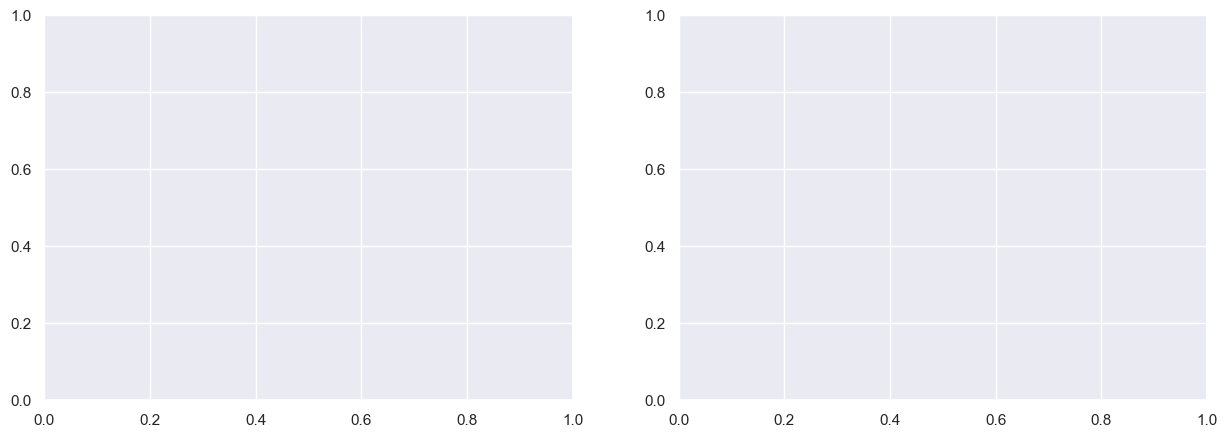

In [74]:
classification_metrics(model_pipe)